In [1]:
import dlib
import cv2
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# Facial Landmark detection

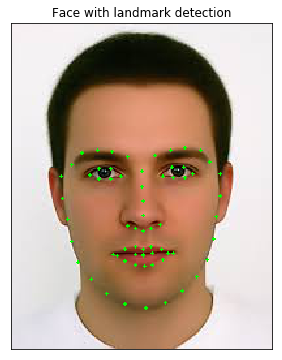

In [2]:
def get_facial_landmarks(predictor_path, image_path):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_path)
    image = io.imread(image_path)
    dets = detector(image, 1)
    #print("Number of faces detected: {}".format(len(dets)))
    for k, d in enumerate(dets):
        #print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(image, d)       
    vec = np.empty([68, 2], dtype = int)
    for b in range(68):
        vec[b][0] = shape.part(b).x
        vec[b][1] = shape.part(b).y
    return vec

def show_facial_landmarks(landmarks, image_path):
    img = cv2.imread(image_path)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    for landmark in landmarks:
        cv2.circle(image, (landmark[0], landmark[1]), 1, (0,255,0), -1)
    
    fig = plt.figure(figsize=(6, 6,))
    ax1 = fig.add_subplot(111)
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    ax1.set_title('Face with landmark detection')
    ax1.imshow(image)
    return None

image_path = './img/face.jpeg'
predictor_path = './../detector_architectures/shape_predictor_68_face_landmarks.dat'
landmarks = get_facial_landmarks(predictor_path, image_path)
show_facial_landmarks(landmarks, image_path)

# Convex hull

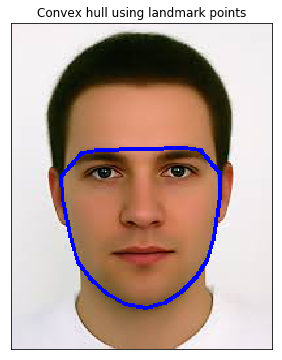

In [3]:
def get_convex_hull(points):
    return cv2.convexHull(points)
    
def draw_convex_hull(points, image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    filler = get_convex_hull(points)
    cv2.drawContours(img, [filler], -1, (0,0,255), 2)
    fig = plt.figure(figsize=(6, 6,))
    ax1 = fig.add_subplot(111)
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    ax1.set_title('Convex hull using landmark points')
    ax1.imshow(img)
    return None

draw_convex_hull(landmarks, image_path)

# Delaunay triangulation

In [12]:
points = []
for chpoints in get_convex_hull(landmarks):
    for point in chpoints:
        points.append([point[0], point[1]])

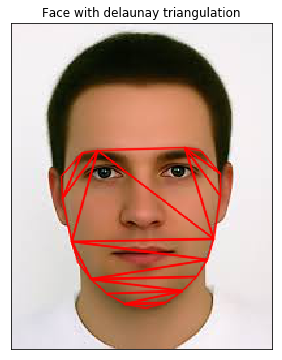

In [62]:
def rect_contains(rect, points):
    if point[0] < rect[0]: return False
    elif point[1] < rect[1]: return False
    elif point[0] > rect[2]: return False
    elif point[1] > rect[3]: return False
    return True

def get_delaunay_triangulation(image_path, points):
    img = cv2.imread(image_path)
    rect = (0, 0, img.shape[1], img.shape[0])
    subdiv = cv2.Subdiv2D(rect)
    for point in points:
        subdiv.insert((point[0], point[1]))
    
    triangleList = subdiv.getTriangleList()
    delaunay = []
    for t in triangleList:
        pt = []
        pt.append((t[0], t[1]))
        pt.append((t[2], t[3]))
        pt.append((t[4], t[5]))
        
        pt1 = (t[0],t[1])
        pt2 = (t[2],t[3])
        pt3 = (t[4],t[5])
        if rect_contains(rect, pt1) and rect_contains(rect, pt2) and rect_contains(rect, pt3):
            ind = []
            for j in range(0, 3):
                for k in range(0, len(points)):
                    if(abs(pt[j][0] - points[k][0]) < 1. and abs(pt[j][1] - points[k][1]) < 1.):
                        ind.append(k)
            if len(ind) == 3:
                delaunay.append((points[ind[0]], points[ind[1]], points[ind[2]]))
    return delaunay

def totuple(a):
    try:
        return tuple(totuple(i) for i in a)
    except TypeError:
        return a
    
def draw_delaunay_triangulation(delaunay):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for point in delaunay:
        pt1 = totuple(point[0])
        pt2 = totuple(point[1])
        pt3 = totuple(point[2])
        cv2.line(img, pt1, pt2, (255,0,0), 1, cv2.LINE_AA, 0)
        cv2.line(img, pt2, pt3, (255,0,0), 1, cv2.LINE_AA, 0)
        cv2.line(img, pt3, pt1, (255,0,0), 1, cv2.LINE_AA, 0)
    fig = plt.figure(figsize=(6, 6,))
    ax1 = fig.add_subplot(111)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title('Face with delaunay triangulation')
    ax1.imshow(img)

delaunay_points = get_delaunay_triangulation(image_path, points)
draw_delaunay_triangulation(delaunay_points)